In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.load('mdata_X.npy')
y = np.load('mdata_y.npy')

In [38]:
images = np.load('images.npy')
images.shape

(2864, 224, 224)

In [36]:
new_images = []
for im in images:
    new_im = (im - im.min())*(1/im.max()) + 0
    new_images.append(new_im)

In [37]:
normalized_images = np.asarray(new_images)

In [39]:
X = np.stack(normalized_images)[...,None]
X = np.repeat(X, 3, axis=-1) #because ImageNet is RGB

In [41]:
np.save('normdata_X.npy', X)

In [42]:
norm_x = np.load('normdata_X.npy')

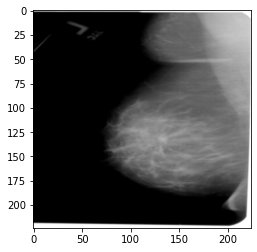

In [60]:
plt.imshow(norm_x[3])

In [45]:
def flipImage(img):
    leftCount = []
    rightCount = []
    for row in range(img.shape[0]):
        leftCount.append(img[row][0:int(img.shape[1]/2)])
        rightCount.append(img[row][int(img.shape[1]/2):img.shape[1]-1])
    left = np.mean(leftCount)
    right = np.mean(rightCount)
    if right > left:
        img = np.fliplr(img)
    
    return img

In [65]:
def backgroundRemoval(img):
    for row in range(img.shape[0]):
        black = False
        for col in range(img.shape[1]):
            if black == True:
                img[row][col][:] = 0
            elif img[row][col][0] == 0 and col > img.shape[1]/2:
                black = True
    
    return img

In [68]:
new_norm_x = []
for im in norm_x:
    new_im = backgroundRemoval(flipImage(im))
    new_norm_x.append(new_im)

In [70]:
new_norm_x = np.asarray(new_norm_x)

In [73]:
np.save('FlBr_normdata_X.npy', new_norm_x)

In [74]:
images = np.load('images.npy')

In [75]:
X = np.stack(images)[...,None]
X = np.repeat(X, 3, axis=-1) #because ImageNet is RGB
X = (X - np.mean(X)) / np.std(X)

In [76]:
new_data_x = []
for im in X:
    new_im = backgroundRemoval(flipImage(im))
    new_data_x.append(new_im)

In [77]:
new_data_x = np.asarray(new_data_x)
np.save('FlBr_mdata_X.npy', new_data_x)